<a href="https://colab.research.google.com/github/Pratyay1010/Upper-limb-movements-can-be-decoded-from-the-time--domain-of-low-frequency-EEG/blob/testing/eeg_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
%%capture
pip install mne

In [101]:
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sig

### **Data Importing**

In [102]:
cd Datasets/S01/S01_ME

[WinError 3] The system cannot find the path specified: 'Datasets/S01/S01_ME'
c:\Users\praty\Documents\Project - Final Year\Datasets\S01\S01_ME


In [103]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 0E41-4584

 Directory of c:\Users\praty\Documents\Project - Final Year\Datasets\S01\S01_ME

20-11-2022  11:47 PM    <DIR>          .
20-11-2022  11:47 PM    <DIR>          ..
26-05-2015  09:18 PM        89,712,620 motorexecution_subject1_run1.gdf
26-05-2015  10:26 PM        90,269,676 motorexecution_subject1_run10.gdf
26-05-2015  09:24 PM        90,269,676 motorexecution_subject1_run2.gdf
26-05-2015  09:32 PM        90,269,676 motorexecution_subject1_run3.gdf
26-05-2015  09:38 PM        89,991,148 motorexecution_subject1_run4.gdf
26-05-2015  09:48 PM        90,269,676 motorexecution_subject1_run5.gdf
26-05-2015  09:59 PM        91,105,260 motorexecution_subject1_run6.gdf
26-05-2015  10:04 PM        91,383,788 motorexecution_subject1_run7.gdf
26-05-2015  10:14 PM        91,662,316 motorexecution_subject1_run8.gdf
26-05-2015  10:21 PM        89,991,148 motorexecution_subject1_run9.gdf
              10 File(s)    904,924,984 bytes


In [104]:
from glob import glob
S01_ME_Files = glob('*.gdf')
#S01_MI_Files = glob('Datasets/S01/S01_MI/*.gdf')

In [105]:
S01_ME_Files

['motorexecution_subject1_run1.gdf',
 'motorexecution_subject1_run10.gdf',
 'motorexecution_subject1_run2.gdf',
 'motorexecution_subject1_run3.gdf',
 'motorexecution_subject1_run4.gdf',
 'motorexecution_subject1_run5.gdf',
 'motorexecution_subject1_run6.gdf',
 'motorexecution_subject1_run7.gdf',
 'motorexecution_subject1_run8.gdf',
 'motorexecution_subject1_run9.gdf']

##Data Testing

In [106]:
raw = mne.io.read_raw_gdf(S01_ME_Files[0], exclude=('eog-r', 'eog-m', 'eog-l','thumb_near', 'thumb_far', 'thumb_index', 'index_near', 'index_far', 'index_middle', 'middle_near', 'middle_far', 'middle_ring', 'ring_near', 'ring_far', 'ring_little', 'litte_near', 'litte_far', 'thumb_palm', 'wrist_bend', 'roll', 'pitch', 'gesture', 'handPosX', 'handPosY', 'handPosZ', 'elbowPosX', 'elbowPosY', 'elbowPosZ', 'ShoulderAdductio', 'ShoulderFlexionE', 'ShoulderRotation', 'Elbow', 'ProSupination', 'Wrist', 'GripPressure'),preload=True)

Extracting EDF parameters from c:\Users\praty\Documents\Project - Final Year\Datasets\S01\S01_ME\motorexecution_subject1_run1.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg
Creating raw.info structure...
Reading 0 ... 164863  =      0.000 ...   321.998 secs...


c:\Users\praty\AppData\Local\Programs\Python\Python310\lib\contextlib.py:142: RuntimeWarning: Channel names are not unique, found duplicates for: {'eeg'}. Applying running numbers for duplicates.
  next(self.gen)


In [107]:
print(raw.info)

<Info | 7 non-empty values
 bads: []
 ch_names: eeg-0, eeg-1, eeg-2, eeg-3, eeg-4, eeg-5, eeg-6, eeg-7, eeg-8, ...
 chs: 61 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 256.0 Hz
 meas_date: 2015-05-26 15:42:48 UTC
 nchan: 61
 projs: []
 sfreq: 512.0 Hz
>


In [108]:
raw.to_data_frame().head(25)

,time,eeg-0,eeg-1,eeg-2,eeg-3,eeg-4,eeg-5,eeg-6,eeg-7,eeg-8,...,eeg-51,eeg-52,eeg-53,eeg-54,eeg-55,eeg-56,eeg-57,eeg-58,eeg-59,eeg-60
0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.001953,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.003906,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.005859,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.007812,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,0.009766,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,0.011719,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,0.013672,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8,0.015625,-4.086637e+09,-3.967849e+09,-4.336031e+09,-4.125436e+09,-3.864307e+09,-4.410733e+09,-5.215298e+09,-4.242579e+09,-4.227743e+09,...,-3.544387e+09,-3.384800e+09,-3.494747e+09,-3.547401e+09,-3.835159e+09,-3.633541e+09,-3.652717e+09,-3.737053e+09,-3.428939e+09,-3.626207e+09
9,0.017578,-4.094279e+09,-3.974687e+09,-4.339747e+09,-4.132001e+09,-3.870871e+09,-4.416634e+09,-5.222529e+09,-4.245489e+09,-4.230128e+09,...,-3.552893e+09,-3.395047e+09,-3.509589e+09,-3.560778e+09,-3.845707e+09,-3.641054e+09,-3.661287e+09,-3.744964e+09,-3.434537e+09,-3.632492e+09


In [109]:
events = mne.events_from_annotations(raw)

Used Annotations descriptions: ['1536', '1537', '1538', '1539', '1540', '1541', '1542', '33536', '33554', '34304', '34305', '34306', '34307', '34308', '34309', '34310', '768', '785', '786']


In [110]:
events

(array([[  2560,      0,     17],
        [  2560,      0,     18],
        [  2560,      0,     19],
        [  3584,      0,      2],
        [  5120,      0,      8],
        [  5120,      0,      9],
        [  5120,      0,     11],
        [  6187,      0,     17],
        [  6187,      0,     18],
        [  6187,      0,     19],
        [  7211,      0,      6],
        [  8747,      0,      8],
        [  8747,      0,      9],
        [  8747,      0,     15],
        [ 10122,      0,     17],
        [ 10122,      0,     18],
        [ 10122,      0,     19],
        [ 11146,      0,      7],
        [ 12682,      0,      8],
        [ 12682,      0,      9],
        [ 12682,      0,     16],
        [ 13902,      0,     17],
        [ 13902,      0,     18],
        [ 13902,      0,     19],
        [ 14926,      0,      7],
        [ 16462,      0,      8],
        [ 16462,      0,      9],
        [ 16462,      0,     16],
        [ 17568,      0,     17],
        [ 1756

In [111]:
events[0]

array([[  2560,      0,     17],
       [  2560,      0,     18],
       [  2560,      0,     19],
       [  3584,      0,      2],
       [  5120,      0,      8],
       [  5120,      0,      9],
       [  5120,      0,     11],
       [  6187,      0,     17],
       [  6187,      0,     18],
       [  6187,      0,     19],
       [  7211,      0,      6],
       [  8747,      0,      8],
       [  8747,      0,      9],
       [  8747,      0,     15],
       [ 10122,      0,     17],
       [ 10122,      0,     18],
       [ 10122,      0,     19],
       [ 11146,      0,      7],
       [ 12682,      0,      8],
       [ 12682,      0,      9],
       [ 12682,      0,     16],
       [ 13902,      0,     17],
       [ 13902,      0,     18],
       [ 13902,      0,     19],
       [ 14926,      0,      7],
       [ 16462,      0,      8],
       [ 16462,      0,      9],
       [ 16462,      0,     16],
       [ 17568,      0,     17],
       [ 17568,      0,     18],
       [ 1

In [112]:
events[1]

{'1536': 1,
 '1537': 2,
 '1538': 3,
 '1539': 4,
 '1540': 5,
 '1541': 6,
 '1542': 7,
 '33536': 8,
 '33554': 9,
 '34304': 10,
 '34305': 11,
 '34306': 12,
 '34307': 13,
 '34308': 14,
 '34309': 15,
 '34310': 16,
 '768': 17,
 '785': 18,
 '786': 19}

In [113]:
event_dir={
    'elbow flexion':1,
    'elbow extension':2,
    'supination':3,
    'pronation':4, 
    'hand close':5,
    'hand open':6,   
    'rest':7
}
event_dir

{'elbow flexion': 1,
 'elbow extension': 2,
 'supination': 3,
 'pronation': 4,
 'hand close': 5,
 'hand open': 6,
 'rest': 7}

C:\Users\praty\AppData\Local\Temp\ipykernel_13968\4215497302.py:1: RuntimeWarning: event 8 missing from event_id will be ignored
  fig = mne.viz.plot_events(events[0], event_id=event_dir, sfreq=raw.info['sfreq'],
C:\Users\praty\AppData\Local\Temp\ipykernel_13968\4215497302.py:1: RuntimeWarning: event 9 missing from event_id will be ignored
  fig = mne.viz.plot_events(events[0], event_id=event_dir, sfreq=raw.info['sfreq'],
C:\Users\praty\AppData\Local\Temp\ipykernel_13968\4215497302.py:1: RuntimeWarning: event 10 missing from event_id will be ignored
  fig = mne.viz.plot_events(events[0], event_id=event_dir, sfreq=raw.info['sfreq'],
C:\Users\praty\AppData\Local\Temp\ipykernel_13968\4215497302.py:1: RuntimeWarning: event 11 missing from event_id will be ignored
  fig = mne.viz.plot_events(events[0], event_id=event_dir, sfreq=raw.info['sfreq'],
C:\Users\praty\AppData\Local\Temp\ipykernel_13968\4215497302.py:1: RuntimeWarning: event 12 missing from event_id will be ignored
  fig = mne.viz.

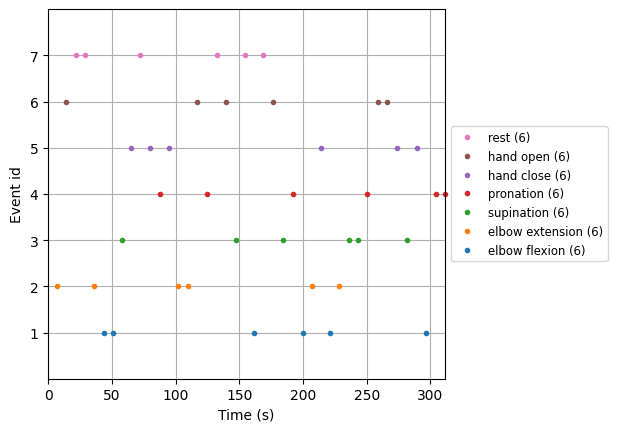

In [114]:
fig = mne.viz.plot_events(events[0], event_id=event_dir, sfreq=raw.info['sfreq'],
                          first_samp=raw.first_samp)

In [115]:
epoch = mne.Epochs(raw,events[0],event_id=[i for i in range(1,8)],tmin=-0.1,tmax=0.7)

Not setting metadata
42 matching events found
Setting baseline interval to [-0.099609375, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


In [116]:
epoch.get_data().shape

Using data from preloaded Raw for 42 events and 410 original time points ...
0 bad epochs dropped


(42, 61, 410)

In [117]:
lables=epoch.events[:,-1]
lables

array([2, 6, 7, 7, 2, 1, 1, 3, 5, 7, 5, 4, 5, 2, 2, 6, 4, 7, 6, 3, 7, 1,
       7, 6, 3, 4, 1, 2, 5, 1, 2, 3, 3, 4, 6, 6, 5, 3, 5, 1, 4, 4])

In [118]:
evoked=[]
for i in range(7):
    evoked.append(epoch[str(i+1)].average())

In [119]:
dicts={
    'elbow flexion':evoked[0],
    'elbow extension':evoked[1],
    'supination':evoked[2],
    'pronation':evoked[3],
    'hand close':evoked[4],
    'hand open':evoked[5],   
    'rest':evoked[6],
}

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


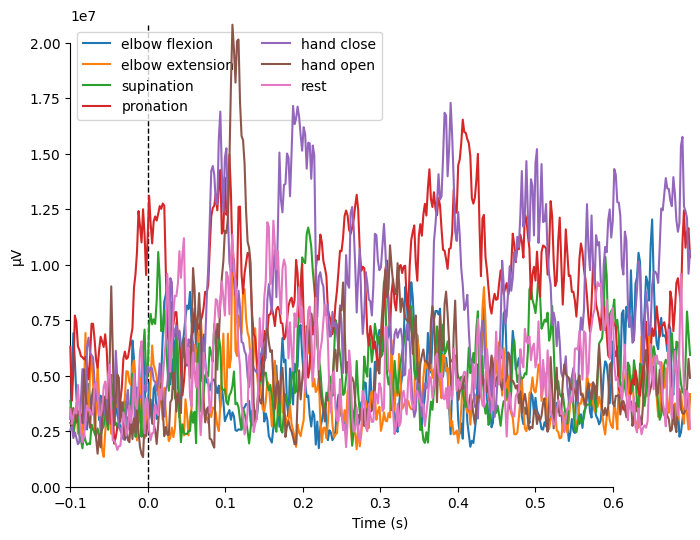

[<Figure size 800x600 with 1 Axes>]

In [120]:
mne.viz.plot_compare_evokeds(dicts) 

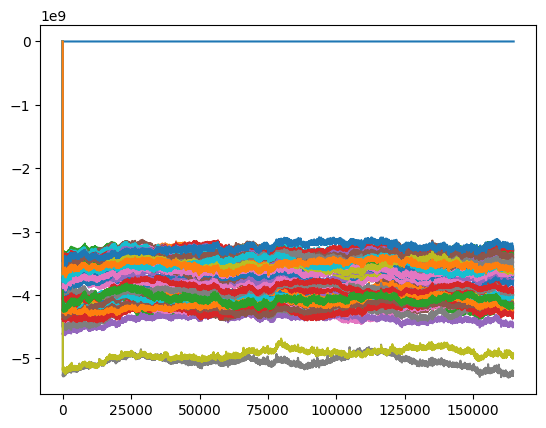

In [121]:
plt.plot(raw.to_data_frame())
plt.show()

In [122]:
#raw.to_data_frame().shape, filtered_data.shape

##Filtering
###Bandpass Filter

In [123]:
def bandpassfilter(signal):

  fs=240.0
  lowcut=0.3
  highcut=70.0

  nyq=0.5*fs
  low=lowcut/nyq
  high=highcut/nyq

  order=2

  b,a = sig.butter(order, [low,high], 'bandpass', analog=False)
  y = sig.filtfilt(b,a,signal,axis=0)

  return y

##Preprocessing
###Power Spectral Density

##Data Concatenetination of all Files(ME)

In [124]:
def read_data(path):
    raw = mne.io.read_raw_gdf(path,exclude=('eog-r', 'eog-m', 'eog-l','thumb_near', 'thumb_far', 'thumb_index', 'index_near', 'index_far', 'index_middle', 'middle_near', 'middle_far', 'middle_ring', 'ring_near', 'ring_far', 'ring_little', 'litte_near', 'litte_far', 'thumb_palm', 'wrist_bend', 'roll', 'pitch', 'gesture', 'handPosX', 'handPosY', 'handPosZ', 'elbowPosX', 'elbowPosY', 'elbowPosZ', 'ShoulderAdductio', 'ShoulderFlexionE', 'ShoulderRotation', 'Elbow', 'ProSupination', 'Wrist', 'GripPressure'),preload=True)
    raw.set_eeg_reference()
    events = mne.events_from_annotations(raw)
    epoch = mne.Epochs(raw,events[0],event_id=[i for i in range(1,8)],tmin=-0.1,tmax=0.7, on_missing='warn')
    lables=epoch.events[:,-1]
    features=epoch.get_data()
    filtered_data = bandpassfilter(features)
    return lables,filtered_data

In [125]:
%%capture
l1,f1 = read_data(S01_ME_Files[0])
l2,f2 = read_data(S01_ME_Files[1])

labels = np.concatenate((l1,l2))
features = np.vstack((f1,f2))

for i in range(2,10):
  l,f = read_data(S01_ME_Files[i])

  labels = np.concatenate((labels,l))
  features = np.vstack((features,f))

In [126]:
print(l.shape,f.shape)
print(labels.shape,features.shape)

(42,) (42, 61, 410)
(420,) (420, 61, 410)


In [127]:
features_final = features.reshape(-1,features.shape[-1])
features_final.shape, labels.shape

((25620, 410), (420,))

In [128]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2, random_state = 0)

In [129]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((336, 61, 410), (84, 61, 410), (336,), (84,))

In [130]:
temp = np.moveaxis(X_train,2,0)
X_train_final = temp[0]

temp = np.moveaxis(X_test,2,0)
X_test_final = temp[0]

#Machine Learning Models

##SVM

In [131]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train_final,y_train)

SVR()

In [132]:
regressor.score(X_test_final,y_test)

-0.10105219342647787

In [133]:
#Accuraccy
print(regressor.score(X_test_final,y_test)*100)

-10.105219342647786


##Logistic Regression

In [134]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train_final, y_train)
clf.predict(X_test_final)
clf.predict_proba(X_test_final)

c:\Users\praty\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[9.76079158e-03, 8.20077864e-02, 1.60809102e-02, 1.02036897e-01,
        7.27440898e-02, 6.57911673e-01, 5.94578523e-02],
       [2.20168227e-02, 6.88415645e-03, 2.58441702e-01, 2.76691881e-01,
        7.79098170e-02, 2.80546382e-01, 7.75092392e-02],
       [3.34069060e-02, 1.00405968e-01, 2.14510173e-02, 6.84048610e-02,
        2.08731471e-01, 5.00929963e-01, 6.66698148e-02],
       [1.55174823e-01, 2.77210957e-01, 2.11126281e-01, 5.83107652e-02,
        1.56531288e-01, 4.44168045e-02, 9.72290802e-02],
       [6.30004873e-02, 8.11124539e-02, 6.28648135e-01, 6.56362849e-02,
        5.87339306e-03, 8.79763982e-02, 6.77528477e-02],
       [5.00477273e-02, 4.22994107e-01, 5.93389826e-02, 4.87401936e-02,
        2.76739600e-02, 1.45627822e-01, 2.45577208e-01],
       [3.00846951e-03, 7.41869549e-03, 8.59013116e-03, 8.57365032e-02,
        1.95389682e-02, 4.95766530e-02, 8.26130579e-01],
       [8.27410938e-02, 3.56420829e-02, 3.58510986e-01, 7.62324808e-02,
        4.19225678e-02, 3

In [135]:
X_test_final.shape, y_test.shape

((84, 61), (84,))

In [136]:
clf.score(X_test_final, y_test)*100

14.285714285714285

In [137]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(p=1)
clf.fit(X_train[:,:,-1], y_train)
predictions = clf.predict(X_test_final)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions)*100,'%')

20.238095238095237 %


##Random Forest

In [138]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

rf.fit(X_train_final, y_train);

In [139]:
predictions = rf.predict(X_test_final)

errors = abs(predictions - y_test)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 1.76 degrees.


In [140]:
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 19.12 %.


#Deep Learning Models

####CNN

In [141]:
features= np.moveaxis(features,1,2)

In [142]:
labels.shape,features.shape

((420,), (420, 410, 61))

In [150]:
from tensorflow.keras.layers import Conv1D, BatchNormalization, LeakyReLU, MaxPool1D,\
 GlobalAveragePooling1D, Dense, Dropout, AveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session

def cnnmodel():
  clear_session()
  model = Sequential()
  model.add(Conv1D(filters=5,kernel_size=3,strides=1,input_shape=(410, 61)))
  model.add(BatchNormalization())
  model.add(LeakyReLU())
  model.add(MaxPool1D(pool_size=2,strides=2))
  model.add(Conv1D(filters=5,kernel_size=3,strides=1))
  model.add(LeakyReLU())
  model.add(MaxPool1D(pool_size=2,strides=2))
  model.add(Dropout(0.5))
  model.add(Conv1D(filters=5,kernel_size=3,strides=2))
  model.add(LeakyReLU())
  model.add(AveragePooling1D(pool_size=2,strides=2))
  model.add(Dropout(0.5))
  model.add(Conv1D(filters=5,kernel_size=3,strides=1))
  model.add(LeakyReLU())
  model.add(GlobalAveragePooling1D())
  model.add(Dense(1,activation='sigmoid'))

  #model.compile('adam', loss='binary_crossentropy', metrics=['accuracy'])
  model.compile(optimizer='adam', loss='BinaryCrossentropy',metrics=['accuracy'])
  return model
  
model = cnnmodel()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 408, 5)            920       
                                                                 
 batch_normalization (BatchN  (None, 408, 5)           20        
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 408, 5)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 204, 5)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 202, 5)            80        
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 202, 5)            0

In [153]:
group_list = [[i]*len(j) for i,j in enumerate(features)]
group_array = np.array(group_list)

In [154]:
group_array = np.moveaxis(group_array,1,0)[0]
group_array

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [146]:
from sklearn.model_selection import GroupKFold, LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler

gkf = GroupKFold()

In [155]:
accuracy = []
for train_index, test_index in gkf.split(features, labels, groups=group_array):
  train_features, train_labels = features[train_index], labels[train_index]
  test_features, test_labels = features[test_index], labels[test_index]

  scaler=StandardScaler()
  train_features = scaler.fit_transform(train_features.reshape(-1,train_features.shape[-1])).reshape(train_features.shape)
  test_features = scaler.transform(test_features.reshape(-1,test_features.shape[-1])).reshape(test_features.shape)

  model = cnnmodel()
  model.fit(train_features,train_labels,epochs=50,validation_data=(test_features,test_labels))
  accuracy.append(model.evaluate(test_features,test_labels)[1])

  break

Epoch 1/50
11/11 [==============================] - 4s 90ms/step - loss: 0.5862 - accuracy: 0.0655 - val_loss: 0.3751 - val_accuracy: 0.1429
Epoch 2/50
11/11 [==============================] - 0s 35ms/step - loss: -0.0581 - accuracy: 0.1429 - val_loss: -0.2376 - val_accuracy: 0.1429
Epoch 3/50
11/11 [==============================] - 0s 33ms/step - loss: -1.0161 - accuracy: 0.1429 - val_loss: -1.1545 - val_accuracy: 0.1429
Epoch 4/50
11/11 [==============================] - 0s 33ms/step - loss: -2.4181 - accuracy: 0.1429 - val_loss: -2.5520 - val_accuracy: 0.1429
Epoch 5/50
11/11 [==============================] - 0s 34ms/step - loss: -4.4555 - accuracy: 0.1429 - val_loss: -4.9814 - val_accuracy: 0.1429
Epoch 6/50
11/11 [==============================] - 0s 36ms/step - loss: -7.4866 - accuracy: 0.1429 - val_loss: -8.8877 - val_accuracy: 0.1429
Epoch 7/50
11/11 [==============================] - 0s 34ms/step - loss: -11.4850 - accuracy: 0.1429 - val_loss: -15.0870 - val_accuracy: 0.1429

In [156]:
accuracy[0]*100

14.28571492433548

In [171]:
np.unique(labels)

array([1, 2, 3, 4, 5, 6, 7])

In [174]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(test_features))))

cm = confusion_matrix(test_labels,y_pred)
clr = classification_report(test_labels, y_pred, target_names=([0,1,2,3,4,5,6,7]))
sns.headmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xtricks()
plt.shoe

3/3 [==============================] - 0s 11ms/step


c:\Users\praty\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\praty\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TypeError: object of type 'int' has no len()